# Credit Risk Analysis by using Machine Learning

### Machine Learning Algorithm

#### Muhammad Nadeem
C00221923@itcarlow.ie

# Libraries

In [4]:
# Import our libraries we are going to use for our data analysis.
import os,csv,io,zipfile,requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
# predict bad loan if the predicted probability is greater than 0.2
from sklearn.preprocessing import binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#Import Xgboost

# For mysql connection
import mysql.connector as sql

# File system manangement
import os

# Deletion  of warning
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

C:\Users\mrferozi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# Reading Data Files

In [5]:
# List files in folder
print(os.listdir("C:/Users/mrferozi/Desktop/Thesis 2019/Dataset/home-credit-default-risk"))

['application_test-t1.dif', 'application_test-t1.txt', 'application_test.csv', 'application_test1.csv', 'application_train.csv', 'application_train1.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'home1.csv', 'HomeCredit_columns_description.csv', 'Home_final.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv', 'test.sql', 'train2.csv']


# Home credit default risk Dataset
References:* From the German Credit Risk Analysis : A Gentle Introduction: [ A Gentle Introduction ](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction)*

In [6]:
# Display Training data
df1 = pd.read_csv('C:/Users/mrferozi/Desktop/Thesis 2019/Dataset/home-credit-default-risk/application_train.csv')
print('Shape of the Traning dataset: ', df1.shape)
df1.head()

Shape of the Traning dataset:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Training dataset consist of 307511 Tuples and 122 observations

In [7]:
# remove multiple rows at once (axis=0 refers to rows)
df1.drop(df1.columns[30:122],axis=1, inplace=True)

In [8]:
print('Shape of the Traning dataset: ', df1.shape)

Shape of the Traning dataset:  (307511, 30)


In [9]:
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [10]:
#create a new data frame
cols = ['TARGET','Gender','Credit_amount','Education','DAYS_BIRTH','Martial_status']
df4 = pd.DataFrame(columns=cols)
df4['Gender']=df1['CODE_GENDER']
df4['DAYS_BIRTH']=df1['DAYS_BIRTH']
df4['Martial_status']=df1['NAME_FAMILY_STATUS']
df4['Education']=df1['NAME_EDUCATION_TYPE']
df4['Credit_amount']=df1['AMT_CREDIT'].astype(int)
df4['TARGET']=df1['TARGET'].astype(int)
df4.shape

(307511, 6)

In [11]:
df4.isnull().sum()

TARGET            0
Gender            0
Credit_amount     0
Education         0
DAYS_BIRTH        0
Martial_status    0
dtype: int64

In [12]:
df4['Age'] = (df1['DAYS_BIRTH'] / 365)* -1
df4['Age']=df4["Age"].astype(float)
df4['Age']=df4["Age"].astype(int)
df4.shape

(307511, 7)

In [13]:
#DAYS_BIRTH
# remove a single column (axis=1 refers to columns)
df4.drop('DAYS_BIRTH', axis=1, inplace=True)

In [14]:
df4.Gender.replace('M',1,inplace=True)
df4.Gender.replace('F',0,inplace=True)

In [15]:
df4.Education.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'], dtype=object)

In [16]:
df4.Education.replace('Academic degree',1,inplace=True)

In [17]:
df4.Education.replace('Higher education',2,inplace=True)

In [18]:
df4.Education.replace('Incomplete higher',3,inplace=True)
df4.Education.replace('Secondary / secondary special',4,inplace=True)
df4.Education.replace('Lower secondary',5,inplace=True)

In [19]:
df4.Martial_status.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [20]:
df4.Martial_status.replace('Single / not married',1,inplace=True)
df4.Martial_status.replace('Civil marriage',2,inplace=True)
df4.Martial_status.replace('Married',3,inplace=True)
df4.Martial_status.replace('Widow',4,inplace=True)
df4.Martial_status.replace('Separated',5,inplace=True)
df4.Martial_status.replace('Unknown',6,inplace=True)

In [21]:
df4.head()

,TARGET,Gender,Credit_amount,Education,Martial_status,Age
0,1,1,406597,4,1,25
1,0,0,1293502,2,3,45
2,0,1,135000,4,1,52
3,0,0,312682,4,2,52
4,0,1,513000,4,1,54


In [22]:
p=df4['TARGET'].value_counts()
print ('The loan paid on time by 0')
print ('The loan not paid on time by 1')
print ('-------------------------------',)
print (p)

The loan paid on time by 0
The loan not paid on time by 1
-------------------------------
0    282686
1     24825
Name: TARGET, dtype: int64


In [23]:
df4.shape

(307511, 6)

In [24]:
df4.to_csv(('C:\\Users\\mrferozi\\Desktop\\Thesis 2019\\Dataset\\home-credit-default-risk\\Home_final.csv'),index=False);

In [25]:
#importing data from database
db_connection = sql.connect(host='localhost', database='credit', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('select * from home_final')
table_rows = db_cursor.fetchall()
data = pd.read_sql('select * from home_final', con=db_connection)
df = pd.DataFrame(data)
df.head()

,TARGET,Gender,Credit_amount,Education,Martial_status,Age
0,1,1,406597,4,1,25
1,0,0,1293502,2,3,45
2,0,1,135000,4,1,52
3,0,0,312682,4,2,52
4,0,1,513000,4,1,54


### Procedures for model assessment

1. ** Training on the same data and testing **
    - It rewards overly complicated "superfit" models and does not generalize training data
2. **Train and trial division**
    - Divide the data set into two pieces for training and testing for various data
    - Better sample output estimate, but still calculate the "high variance"
    - Useful due to its rapidity, flexibility and ease
3. **K-fold cross-validation**
    - Systematically and average results together create "K" training / test divisions.
    - Still improved output estimates
    - Larger than the split train and test times are "K"


### Prototypical metrics for valuation

- **Reversion/Regression difficulties:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Cataloguing/Classification difficulties:** Cataloguing accuracy


What is the **response**?
- Bad Loan (TARGET): To predict the bad loan by using Age,Gender,Martila Status and Education

### Model selection
**Goal:** Compare the best KNN model with logistic regression and Decision Tree

**Question: ** Can we predict the bad loan of a credit risk data by given Age, Gender, Education and Martial Status?

In [26]:
# define X and y
feature_cols = ['Age','Gender','Education','Martial_status']
X = df[feature_cols]
y = df.TARGET

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Logistic Regression

In [27]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print ((cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())*100)

91.9270130754


### K-Nearest Neighbors 

In [30]:
# define X and y
feature_cols = ['Age','Gender','Education','Martial_status']
X = df[feature_cols]
y = df.TARGET

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
print ((cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())*100)

91.2317440786


### Decision Tree

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# define X and y
feature_cols = ['Age','Gender','Education','Martial_status']
X = df[feature_cols]
y = df.TARGET

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [33]:
# make predictions on out-of-sample data
preds = tree.predict(X_test)
print(preds)

[0 0 0 ..., 0 0 0]


In [35]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeClassifier(random_state=0)
print ((cross_val_score(tree, X, y, cv=10, scoring='accuracy').mean())*100)

91.9120540113


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [36]:
# define X and y
feature_cols = ['Age','Gender','Education','Martial_status']
X = df[feature_cols]
y = df.TARGET

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    70678
1     6199
Name: TARGET, dtype: int64

In [38]:
# calculate the percentage of ones
y_test.mean()

0.08063530054502648

In [39]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)*100

0    91.93647
Name: TARGET, dtype: float64

Comparing the **true** and **predicted** response values

In [40]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Cataloguing accuracy:** percentage of correct predictions

In [41]:
# calculate accuracy
from sklearn import metrics
a =metrics.accuracy_score(y_test, y_pred_class)
print((metrics.accuracy_score(y_test, y_pred_class))*100)

91.9364699455


Cataloguing accuracy or ratio of correct predictions is ***91.93*** Percent is very Good. 

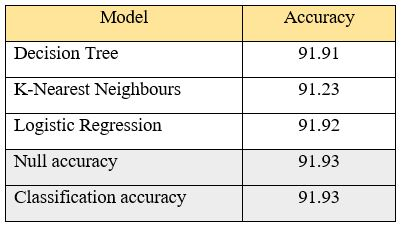

In [42]:
from IPython.display import Image
Image(filename='C:/Users/mrferozi/Desktop/Thesis 2019/Img/ac1.jpg') 

**Result: **

- Cataloguing accuracy is the **calmest classification metric to know**
- Nonetheless it does not tell you the **fundamental delivery** of answer values
- What * * "types" of mistakes * * make of your classification does not tell you.


## Confusion matrix

In [43]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[70678     0]
 [ 6199     0]]


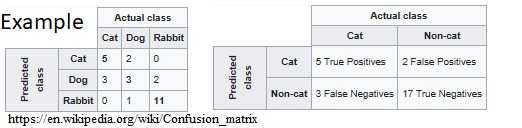

In [44]:
from IPython.display import Image
Image(filename='C:/Users/mrferozi/Desktop/Thesis 2019/Img/cexam.jpg') 

- The bottom right is called the true positive. **True Positives (TP):** we *correctly* predicted that they *do* fall between good loan or bad loan. It is indicated that 0 cases the classifier identified correctly predicted the Bad Loan. 

- Upper left is called true negative.**True Negatives (TN):** we *correctly* predicted that they *don't* fall between good loan and bad loan . The true negative is 70678 cases the classifier correctly predicted. 

- The upper right is called false positive.**False Positives (FP):** we *incorrectly* predicted that they *do* fall between good loan and bad loan (a "Type I error"),It is indicate the 0 cases the classifier incorrectly predicted when in-fact they do not. 

- The bottom left is called the false negative.**False Negatives (FN):** we *incorrectly* predicted that they *don't* have fall between good loan and bad loan (a "Type II error") Which is indicated from the 6199 cases the classifier predicted incorrectly.

In [45]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)

In [47]:
confusion

array([[70678,     0],
       [ 6199,     0]])

Where 1 represent positive and 0 present negative.

In [48]:
#Where 1 represent positive and 0 present negative.
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix
**Classification Accuracy:** Overall, how often is the classifier correct?

classification accuracy = correct predictions / total predictions
- References:* From the: [ What is a Confusion Matrix in Machine Learning ](https://machinelearningmastery.com/confusion-matrix-machine-learning/)*

In [49]:
print (((TP + TN) / float(TP + TN + FP + FN))*100,' ','Percent')
print ((metrics.accuracy_score(y_test, y_pred_class))*100,' ','Percent')

91.9364699455   Percent
91.9364699455   Percent


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [50]:
print (((FP + FN) / float(TP + TN + FP + FN))*100,' ','Percent')
print ((1 - metrics.accuracy_score(y_test, y_pred_class))*100,' ','Percent')

8.0635300545   Percent
8.0635300545   Percent


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [51]:
print ((TP / float(TP + FN))*100,' ','Percent')

0.0   Percent


In [52]:
Sensitivity1 =((TP / float(TP + FN))*100)
Sensitivity1

0.0

**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [53]:
specificity1=((TN / float(TN + FP))*100)
print((TN / float(TN + FP))*100,' ','Percent')

100.0   Percent


**Conclusion:**

- Confusion matrix gives us a **more complete picture** of how our classifier is performing
- Also allows us to compute various **classification metrics**, and these metrics can guide model model selection

## Adjusting the classification threshold

In [55]:
# define X and y
feature_cols = ['Age','Gender','Education','Martial_status']
X = df[feature_cols]
y = df.TARGET

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.93748025,  0.06251975],
       [ 0.89253537,  0.10746463],
       [ 0.88240768,  0.11759232],
       [ 0.8949445 ,  0.1050555 ],
       [ 0.96044538,  0.03955462],
       [ 0.91923737,  0.08076263],
       [ 0.89694025,  0.10305975],
       [ 0.94691998,  0.05308002],
       [ 0.94674606,  0.05325394],
       [ 0.95114126,  0.04885874]])

In [58]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.06251975,  0.10746463,  0.11759232,  0.1050555 ,  0.03955462,
        0.08076263,  0.10305975,  0.05308002,  0.05325394,  0.04885874])

In [59]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [60]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

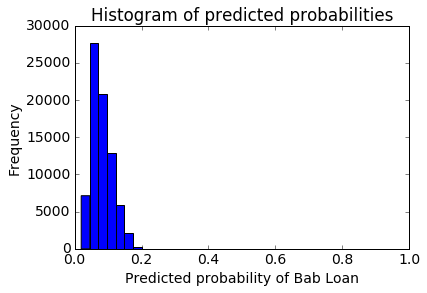

In [61]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Bab Loan')
plt.ylabel('Frequency')

Histogram show us the distribution of numerical variable we can see the height of the second bar for example 25000 and more percent of the observations had values between 0.0 and 0.2 given the 0.2 classification threshold. The predicted probablity of bad loan is almost 0.2 percent which is very good.

**Decrease the threshold** for predicting Bad Loan in order to **increase the sensitivity** of the classifier

In [99]:
# predict bad loan if the predicted probability is greater than 0.1
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.1)[0]

In [100]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.06251975,  0.10746463,  0.11759232,  0.1050555 ,  0.03955462,
        0.08076263,  0.10305975,  0.05308002,  0.05325394,  0.04885874])

In [101]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.])

In [102]:
# previous confusion matrix (default threshold of 0.2)
print(confusion)

[[70678     0]
 [ 6199     0]]


In [103]:
# new confusion matrix (threshold of 0.1)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[52896 17714]
 [ 4710  1557]]


- The bottom right is called the true positive. **True Positives (TP): ** we *correctly* predicted that they *do* fall between good loan and bad loan. It is indicating that it was before 0 and now 2457 cases the classifier identified correctly predicted which is mean true positive increased 2547 Percent. 

- The Upper left is called true negative. **True Negatives (TN): ** we *correctly* predicted that they *don't* fall between good loan and bad loan. Which was before 70678 is now 53864 cases the classifier correctly predicted which is meant it fell to 16814. 

- The upper right is called a false positive. **False Positives (FP): ** we *incorrectly* predicted that they *do* fall between good loan and bad loan (a "Type I error"). It was before 0 now, which is implied, it increases to 16814, the system indicates the 16814 cases the classifier incorrectly predicted. 

- The bottom left is called the false negative. **False Negatives (FN): ** we *incorrectly* predicted that they *don't* have fallen between good loan and bad loan (a "Type II error"). Which is indicated for the 6199 to 3742 the classifier predicted incorrectly, which is decreased to 2457 percentage. The outcome establishes that by decreasing predicted probability in 0.1 we are committing type I Error.

- If study is right and throwaway the null hypothesis, study will make an error of type I. The probability that an error of type I is made is α, which is study hypothesis testing level of significance. An α of 0.05 shows that if study refuse the 0,05 hypothesis, this study ready to accept a 5% risk of wrong. - References:* From the: [ What are type I and type II errors?](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/type-i-and-type-ii-error/)

Our main purpose of the exercise to increase the True positive which is increased by 2457 and decrease the true negative which is decrease 53864 percent. It is the great outcome for further this study decides to use Linear support vector for more classification model evaluation to receive a better result and to ascertain the best exemplar.

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- Sensitivity mean here to the test's ability to correctly observe the applicant who does own the bad loan from the given dataset

In [105]:
print('Previouse Sensitivity',Sensitivity1)

Previouse Sensitivity 0.0


In [106]:
Sensitivity2 =((TP / float(TP + FN))*100)
Sensitivity2

0.0

In [107]:
print ('sensitivity has increased:',Sensitivity2 - Sensitivity1,'Percent')

sensitivity has increased: 0.0 Percent


**Specificity:** When the actual value is negative, how often is the prediction correct?

- Specificity mean here is that the test's ability to correctly reject the applicant who does not own the bad loan from the given dataset



In [70]:
specificity2=((TN / float(TN + FP))*100)
print((TN / float(TN + FP))*100,' ','Percent')

100.0   Percent


In [71]:
print('Previouse specificity','',specificity1)

Previouse specificity  100.0


## ROC Curves and Area Under the Curve (AUC)
By, using ROC Curves and Area Under the Curve (AUC).We could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold

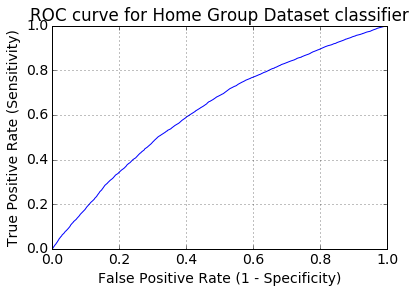

In [73]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Home Group Dataset classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help us to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- We can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [74]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [75]:
evaluate_threshold(0.1)

Sensitivity: 0.396354250686
Specificity: 0.762104190837


In [76]:
evaluate_threshold(0.2)

Sensitivity: 0.000806581706727
Specificity: 0.99960383712


- Sensitivity mean here to the test's ability to correctly observe the applicant who does own the bad loan from the given dataset

- Specificity mean here is that the test's ability to correctly reject the applicant who does not own the bad loan from the given dataset

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [77]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob)*100)

62.476631578


- AUC is useful as a **single number summary** of classifier performance.
- If we randomly chose one positive and one negative observation, AUC represents the likelihood that our classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [78]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()*100

62.046233923418455

**Confusion matrix advantages:**

- Allows us to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require us to **set a classification threshold**
- Still useful when there is **high class imbalance**

## Linear Support Vector Classifier (SVC)

In [116]:
from sklearn.svm import LinearSVC
clf = LinearSVC(loss = 'l2') # instantiated with L2 loss
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


In [117]:
clf = clf.fit(X, y)

creating an instance of the classifier.  This can be done simply by calling the class name, with any arguments that the object accepts:

In [118]:
clf = LinearSVC(loss = 'l2')

``clf`` is a statistical model that has parameters that control the learning algorithm (those parameters are sometimes called the *hyperparameters*). Those hyperparameters can be supplied by the user in the constructor of the model.

In [119]:
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


By default the model parameters are not initialized. They will be tuned automatically from the data by calling the ``fit`` method with the data ``X`` and labels ``y``:

In [120]:
clf = clf.fit(X, y)

We can now see some of the fit parameters within the classifier object.

**In scikit-learn, parameters defined by training have a trailing underscore.**

In [121]:
clf.coef_

array([[-0.00739975,  0.02936343,  0.06101031, -0.01021481]])

In [122]:
clf.intercept_

array([-0.82853196])

Once the model is trained, it can be used to predict the most likely outcome on unseen data.

In [123]:
df.dtypes

TARGET            int64
Gender            int64
Credit_amount     int64
Education         int64
Martial_status    int64
Age               int64
dtype: object

In [124]:
#feature_cols = ['Age','Gender','Education','Martial_status']
X_new = [[50, 2, 3, 2]] 
clf.predict(X_new) #Target variable Good loan /bad loan

array([0], dtype=int64)

All classification tasks involve predicting an unknown category based on observed features.

# Probabilistic Prediction

In [125]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X, y)
print (clf2.predict_proba(X_new))

[[ 0.90939257  0.09060743]]


In [126]:
clf2.predict(X_new) #loan condition 

array([0], dtype=int64)

-The result gives the probability (between zero and one) that the test point comes from any of the three classes.

-This means that the model estimates that the sample in X_new has:

- 90% likelyhood to belong to the ‘Loan Condition’ class (''Target=0'')
- 9% likelyhood to belong to the ‘Loan Condition’ class (''Target=0'')
- < 1% likelyhood to belong to the ‘Loan Condition’ class (''Target=0'')


# Evaluating the Model

Let's get a rough evaluation our model by using
it to predict the values of the training data:

In [90]:
y_model = clf2.predict(X)

In [91]:
print (y_model == y)

0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26        False
27         True
28         True
29         True
          ...  
307477    False
307478     True
307479     True
307480     True
307481     True
307482     True
307483     True
307484     True
307485    False
307486     True
307487     True
307488     True
307489     True
307490     True
307491     True
307492     True
307493     True
307494     True
307495     True
307496     True
307497     True
307498     True
307499     True
307500     True
307501     True
307502     True
307503     True
307504     True
307505    False
307506     True
Name: TARGET, Length: 30

# Measuring Classification Performance: Validation & Testing

### Cross-Validation
Learning the parameters of a prediction function and testing it on the
same data is a methodological mistake: a model that would just repeat
the labels of the samples that it has just seen would have a perfect
score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

- a training set X_train, y_train which is used for learning the parameters of a predictive model
- a testing set X_test, y_test which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the
`train_test_split` helper function.  It can be used this way:

In [92]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0) # 25% of test data

print (X.shape, X_train.shape, X_test.shape) #  Training data => (6463, 5)

(307507, 4) (230630, 4) (76877, 4)


Now we train on the training data, and test on the testing data:

In [93]:
clf = LinearSVC(loss='l2').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (y_pred == y_test)

289122     True
188488     True
181174     True
247946     True
231635     True
119276     True
263751    False
152308     True
75016      True
285678     True
242533     True
24520      True
24307      True
246827     True
123224     True
251315     True
15118      True
96597      True
212107     True
264500     True
228807     True
244997     True
267438     True
59650      True
3220       True
63120      True
65145      True
187721     True
60151      True
56096      True
          ...  
169766     True
90321      True
269463     True
294365    False
20992      True
63822      True
74778      True
250979     True
242315     True
122185     True
92357      True
30420      True
163926     True
59132      True
291648     True
53974      True
268684     True
191969     True
182063     True
141605     True
103139     True
280788     True
63712      True
219536     True
7914       True
128889     True
45598      True
109855     True
147469     True
56665      True
Name: TARGET, Length: 76

 we drastically reduce the number
of samples which can be used for learning the model, and the results
can depend on a particular random choice for the pair of (train, test) sets.

A solution is to split the whole data several consecutive times in different
train set and test set, and to return the averaged value of the prediction
scores obtained with the different sets. Such a procedure is called **cross-validation**.
This approach can be computationally expensive, but does not waste too much data
(as it is the case when fixing an arbitrary test set), which is a major advantage
in problem such as inverse inference where the number of samples is very small.

We'll explore cross-validation , but
for more information on cross-validation in scikit-learn here:
http://scikit-learn.org/dev/modules/cross_validation.html


# Cross-validation for parameter tuning, model selection, and feature selection

In [94]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ((metrics.accuracy_score(y_test, y_pred))*100)

91.4434746413


we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together and That's the essense of **cross-validation!**

## Method Of K-cross Validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

### Parameter tuning
**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN

In [95]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[ 0.91275364  0.91542014  0.91353127  0.9166206   0.91743358  0.90933333
  0.91245528  0.91469919  0.91268293  0.91590244]


In [96]:
# use average accuracy as an estimate of out-of-sample accuracy
print ('An estimate of out-of-sample accuracy',(scores.mean())*100)

An estimate of out-of-sample accuracy 91.4083239242


In [97]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.85644211890098099, 0.9123174407864264, 0.90275015231152123, 0.91682462429528111, 0.91408323924227974, 0.91812868119310165, 0.91667504930582688, 0.91874980745438939, 0.91852542175779361, 0.91916931838048066, 0.91908476775574588, 0.91918232703933056, 0.91916931890924913, 0.91924086299019481, 0.91914655404710532, 0.91926687872158863, 0.91925061908775574, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91914330148581624, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913, 0.91927013075410913]


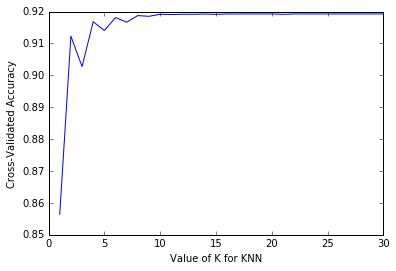

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

The following graphs display the higher value of k is better for our model accuracy and with K=5 we will get max of 91 percent of accuracy which is good.

From the above result we are selecting KNN Neighbours with K=5 which is produce a better mean accuracy which is 91.23 percent aproximately. As compare to logistic regression. The logistic regression offer mean accuracy of 91.9270  which is approximately 92% percent that is very Hihgh So, because of that result, this study will use Logistic Regression for our predictions.

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- German Credit Risk Analysis : Beginner's Guide: [ Beginner's Guide ](https://www.kaggle.com/pahulpreet/german-credit-risk-analysis-beginner-s-guide/notebook) 


- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)